In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.axes_grid1.axes_grid as axes_grid
#from mpl_toolkits.axes_grid.colorbar import colorbar
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import astropy.io.fits #not pyfits
import matplotlib.colors as mcolors
from matplotlib.patches import Ellipse
from spectral_cube import SpectralCube
import astropy.units as u

In [10]:
nrows = 1
ncols = 5

Glob = 'GlobB_12CO.image.pbcor.fits'
cube = SpectralCube.read(Glob)
cube_kms = cube.with_spectral_unit(u.km/u.s, velocity_convention = "optical")


# Creates MxN Grid for Tot CHANNELS
def setup_axes(fig):
    g = axes_grid.ImageGrid(fig, 111, nrows_ncols=(nrows, ncols), ngrids=None, direction='row', axes_pad=0.01, add_all=True, share_all=True, aspect=True, label_mode='L', cbar_mode=None)
    # make colorbar
    ax = g[-1]
    cax = inset_axes(ax,
                     width="8%", # width = 10% of parent_bbox width
                     height="100%", # height : 50%
                     loc=3,
                     bbox_to_anchor=(1.01, 0, 1, 1),
                     bbox_transform=ax.transAxes,
                     borderpad=0.
                     )
    return g, cax

print(cube.shape)

(32, 250, 250)


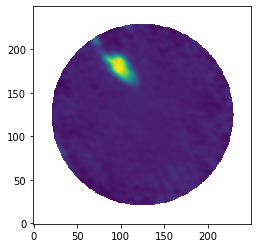

In [12]:
#fig1 = plt.subplot(1,1,1)
cube[0,:,:]
plt.imshow(np.array(cube[15,:,:]), origin = 'lower')

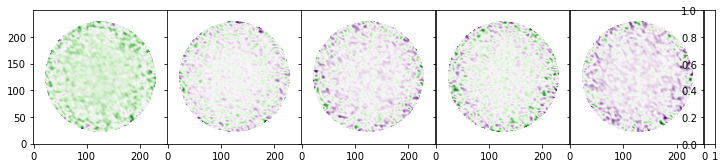

In [8]:
fig = plt.figure(1, figsize=(ncols*2+2, nrows*2+2))
g, cax = setup_axes(fig)

for i, ax in enumerate(g):
    channel_number = i
    channel = cube_kms[channel_number,:,:]
    im = ax.imshow(np.array(channel), origin="lower", cmap='PRGn')